In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import seaborn as sns
import scipy
import netket as nk
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"

PATH = os.getcwd()

<Axes: ylabel='Density'>

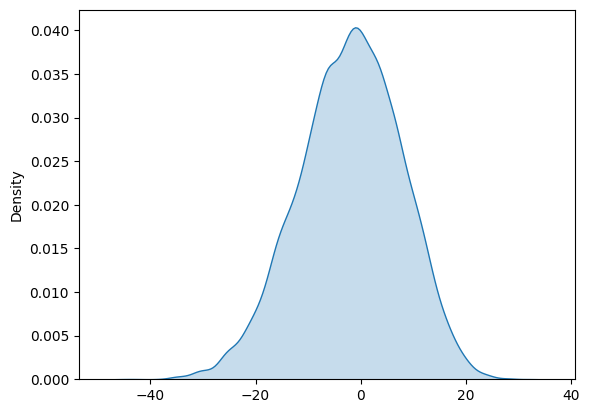

In [8]:
H = sparse.load_npz(PATH + '/data/J1='+str(round(1,3))+'.J2='+str(round(0.0,3))+'hamiltonian.npz')

numEnergies = 12870
energies, states = scipy.linalg.eig(H.asfptype().toarray())
energies = np.real(energies)
states = np.real(states)

sns.kdeplot(energies, fill=True)

In [10]:
np.sort(energies)[-1]

32.000214

In [3]:
lattice = nk.graph.Grid(extent=[4,4], pbc=True)
hilbertSpace = nk.hilbert.Spin(s=0.5, total_sz=0, N=16)
hamiltonian = nk.operator.Heisenberg(hilbert=hilbertSpace, graph=lattice)

netketH = hamiltonian.to_sparse().toarray()

evals = nk.exact.lanczos_ed(hamiltonian, k=numEnergies)
print(evals)

C:\Users\jerry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:1592: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [ ]:
print(H)
print(netketH)

  (0, 0)	1.0
  (0, 0)	1.0
  (0, 0)	1.0
  (0, 0)	0.0
  (0, 0)	0.0
  (0, 0)	-1.0
  (0, 0)	-0.0
  (0, 0)	-0.0
  (0, 0)	1.0
  (0, 0)	0.0
  (0, 0)	1.0
  (0, 0)	0.0
  (0, 0)	-0.0
  (0, 0)	-1.0
  (0, 0)	-0.0
  (0, 0)	1.0
  (0, 0)	0.0
  (0, 0)	1.0
  (0, 0)	0.0
  (0, 0)	-0.0
  (0, 0)	-1.0
  (0, 0)	-0.0
  (0, 0)	0.0
  (0, 0)	0.0
  (0, 0)	1.0
  :	:
  (12869, 12869)	-1.0
  (12869, 12869)	-0.0
  (12869, 12869)	-0.0
  (12869, 12869)	-0.0
  (12869, 12869)	-1.0
  (12869, 12869)	1.0
  (12869, 12869)	1.0
  (12869, 12869)	1.0
  (12869, 12869)	0.0
  (12869, 12869)	0.0
  (12869, 12869)	1.0
  (12869, 12869)	0.0
  (12869, 12869)	1.0
  (12869, 12869)	0.0
  (12869, 12869)	1.0
  (12869, 12869)	0.0
  (12869, 12869)	1.0
  (12869, 12869)	0.0
  (12869, 12869)	0.0
  (12869, 12869)	0.0
  (12869, 12869)	1.0
  (12869, 12869)	1.0
  (12869, 12869)	1.0
  (12869, 12869)	1.0
  (12869, 12869)	1.0
[[16.  0.  0. ...  0.  0.  0.]
 [ 0.  8. -2. ...  0.  0.  0.]
 [ 0. -2.  8. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  8. -2.  0.]
 

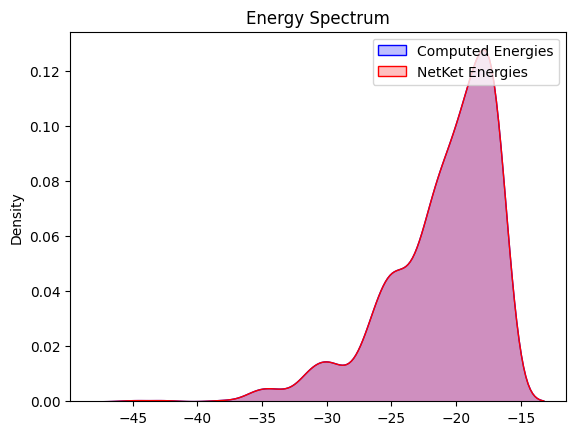

In [ ]:
sns.kdeplot(energies, fill=True, color="blue", label="Computed Energies")
sns.kdeplot(evals, fill=True, color="red", label="NetKet Energies")
plt.title("Energy Spectrum")
plt.legend()
plt.show()

In [ ]:
import random

N = len(H.toarray())

def sampleStates(numSamples,k,biasAvg,biasStd):
    energySamples = []
    for count in range(numSamples):
        vec = np.random.rand(N)

        sample = random.sample(range(0,N),k)
        for i in sample:
            vec[i] += np.random.normal(loc=biasAvg, scale=biasStd)

        vec /= np.linalg.norm(vec)

        energy = np.array([vec]) @ H @ np.array([vec]).T
        energySamples.append(energy[0][0])

    return energySamples

numSamples = 50
k = 5
biasAvg = 6
biasStd = 60

energySamples = sampleStates(numSamples,k,biasAvg,biasStd)
print(np.var(sampleStates(numSamples,k,biasAvg,biasStd)))

13.246264057161408


### Symmetry Testing

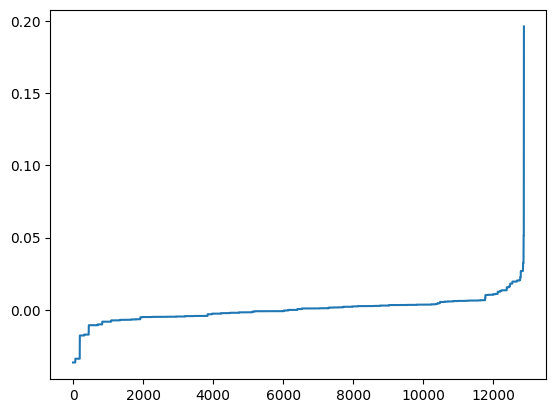

In [ ]:
H = sparse.load_npz(PATH + '/data/J1='+str(round(1,3))+'.J2='+str(round(0.0,3))+'hamiltonian.npz')

numEnergies = 1
energies, states = sparse.linalg.eigs(H.asfptype(), k=numEnergies, which='SR')
energies = np.real(energies)
states = np.real(states)

sortedStates = np.sort(states,axis=0)
plt.plot(sortedStates)

101 [-0.036458194, -0.03385045, -0.017780965, -0.017156204, -0.0106757255, -0.010104556, -0.00824096, -0.007315411, -0.0069700344, -0.006909499, -0.00687902, -0.0066737514, -0.0065312074, -0.0051611564, -0.0050108014, -0.0049242773, -0.0048953113, -0.0048589827, -0.0048063556, -0.0046507865, -0.004374734, -0.0042787264, -0.0042527397, -0.0042303465, -0.0030806875, -0.002664937, -0.002348248, -0.0022733314, -0.0020668097, -0.0017763509, -0.0017266829, -0.0012265822, -0.000999704, -0.00094295014, -0.00048038183, -8.880584e-05, 0.00049396086, 0.00091547833, 0.00094917865, 0.0010712113, 0.0015186755, 0.0016255131, 0.0017165844, 0.0020892683, 0.0023294578, 0.002367325, 0.0023788312, 0.0025406324, 0.0025566884, 0.002585167, 0.0026533327, 0.0027234275, 0.0029267112, 0.0032648498, 0.003314887, 0.0033982533, 0.003544816, 0.0035556322, 0.0035677708, 0.0035846436, 0.0035978847, 0.0038081873, 0.0040643658, 0.0041635563, 0.004546032, 0.005415115, 0.005637327, 0.005781006, 0.005862544, 0.006053772, 

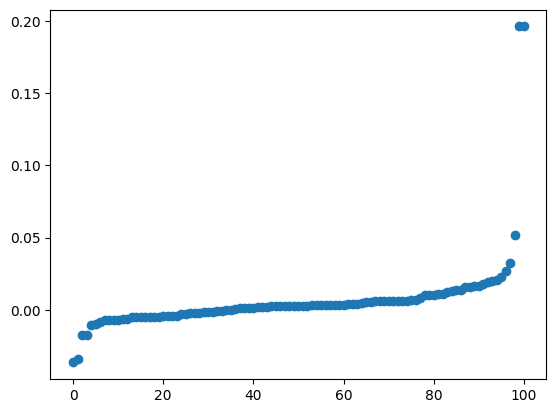

In [ ]:
tolerance = 3e-6
reducedStates = []

temp = 1e7
for val in sortedStates:
    if np.abs(val[0]-temp) > tolerance:
        temp = val[0]
        reducedStates.append(temp)

reducedDim = len(reducedStates)

plt.scatter(range(0,reducedDim),reducedStates)

print(reducedDim,reducedStates)